# Student grades prediction

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# The Data

In [5]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
df.info() #information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [10]:
df.describe() #Dataset descriptiption

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [11]:
df.head() #first five values of dataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [12]:
df.tail() #last five value of dataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [13]:
df.isnull().any()

Seat No.     False
PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool

<Axes: >

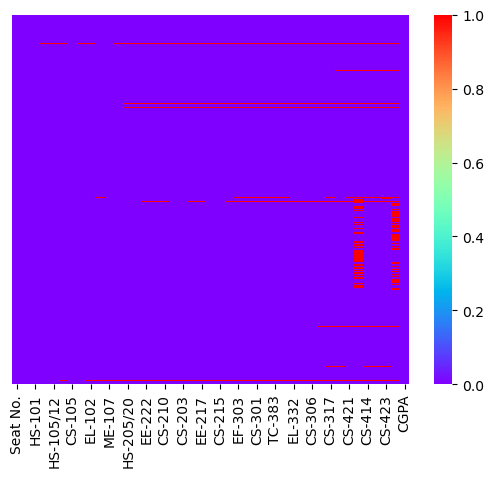

In [14]:
sns.heatmap(df.isnull(),cmap="rainbow",yticklabels=False)    # To check any null values present in dataset pictorially

<Axes: >

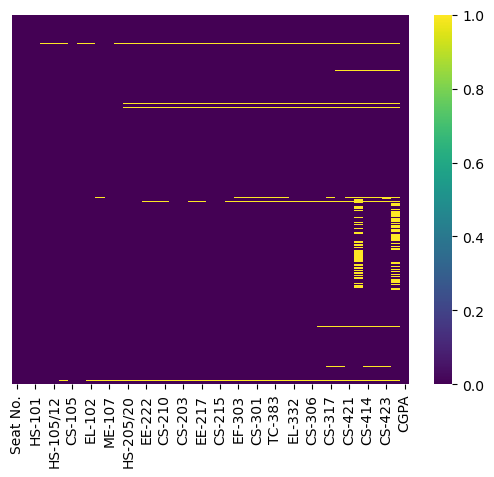

In [15]:
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)    # Map color - viridis

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

In [20]:
for i in df.columns:
    print(df[i].unique())
    print('\n')

['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087' 'CS-97088' 'CS-97089' 'CS-97

In [21]:
for i in df.columns:
    print(df[i].nunique())
    print(i)
    print('\n')

571
Seat No.


13
PH-121


12
HS-101


13
CY-105


13
HS-105/12


13
MT-111


11
CS-105


13
CS-106


13
EL-102


12
EE-119


13
ME-107


14
CS-107


13
HS-205/20


14
MT-222


13
EE-222


14
MT-224


14
CS-210


14
CS-211


13
CS-203


13
CS-214


13
EE-217


12
CS-212


14
CS-215


12
MT-331


12
EF-303


14
HS-304


12
CS-301


11
CS-302


12
TC-383


12
MT-442


13
EL-332


14
CS-318


13
CS-306


14
CS-312


12
CS-317


11
CS-403


13
CS-421


14
CS-406


13
CS-414


12
CS-419


12
CS-423


13
CS-412


491
CGPA




In [22]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [24]:
df.shape

(571, 43)

In [25]:
df.replace(np.nan,'',regex=True) #Replacing Nan inplace of empty string

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [26]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [31]:
#null value replaced by mode [0]
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [33]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [35]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [36]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorial Column',cat_col)
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('numerical Column',num_col)

Categorial Column ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
numerical Column ['CGPA']


<function matplotlib.pyplot.show(close=None, block=None)>

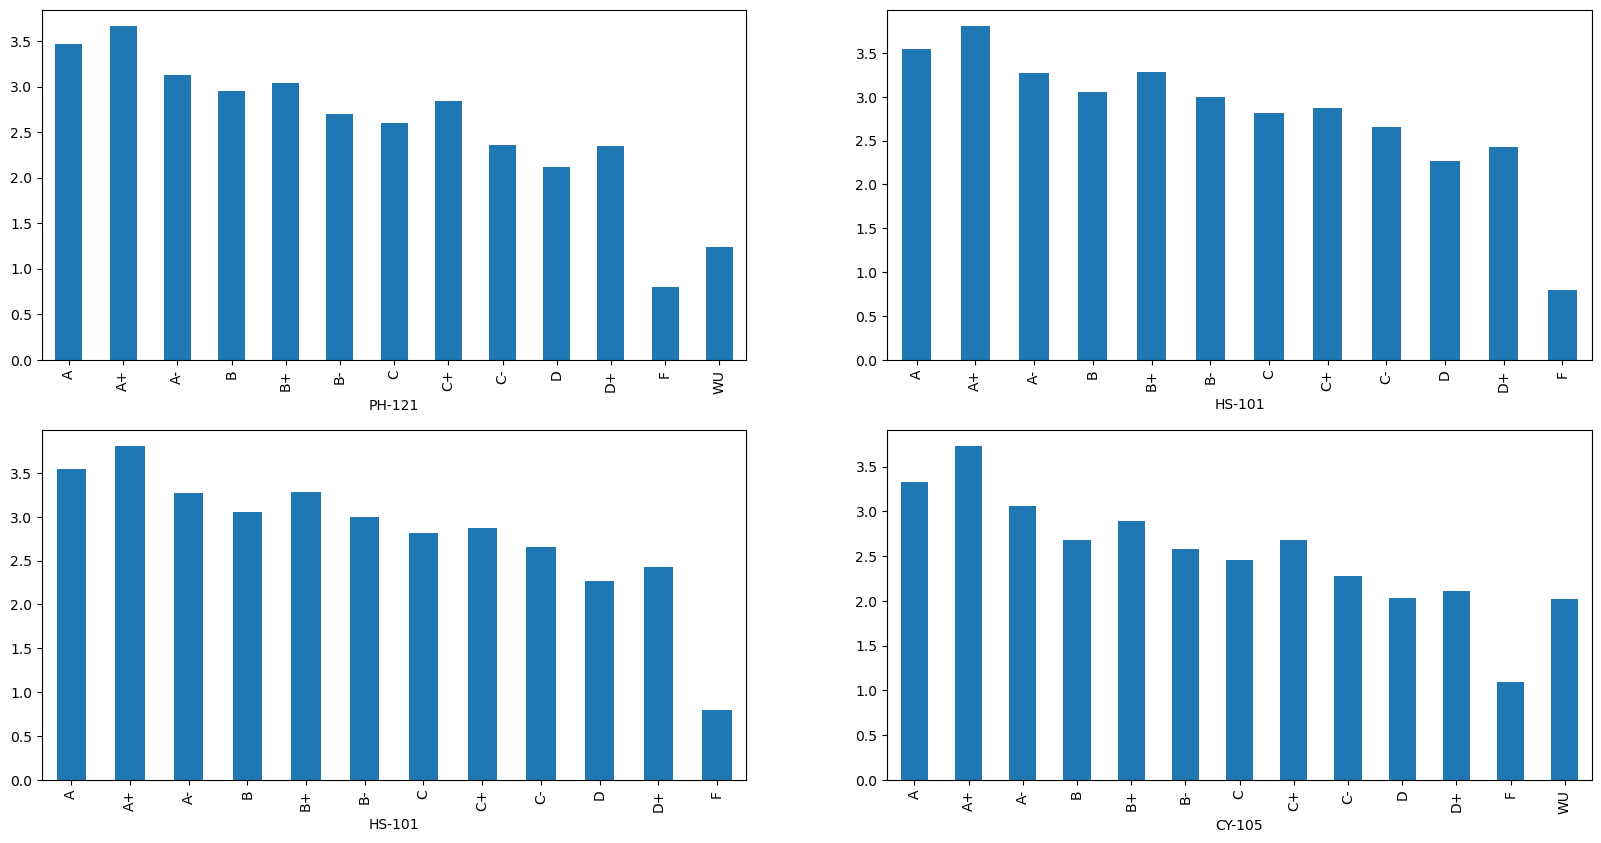

In [37]:
features =[ 'PH-121', 'HS-101','HS-101', 'CY-105']
plt.subplots(figsize=(20, 10))
for i, k in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(k).mean()['CGPA'].plot.bar()
plt.show

# Comparing between CGPA to different features
# If the student score A+ having more CGPA

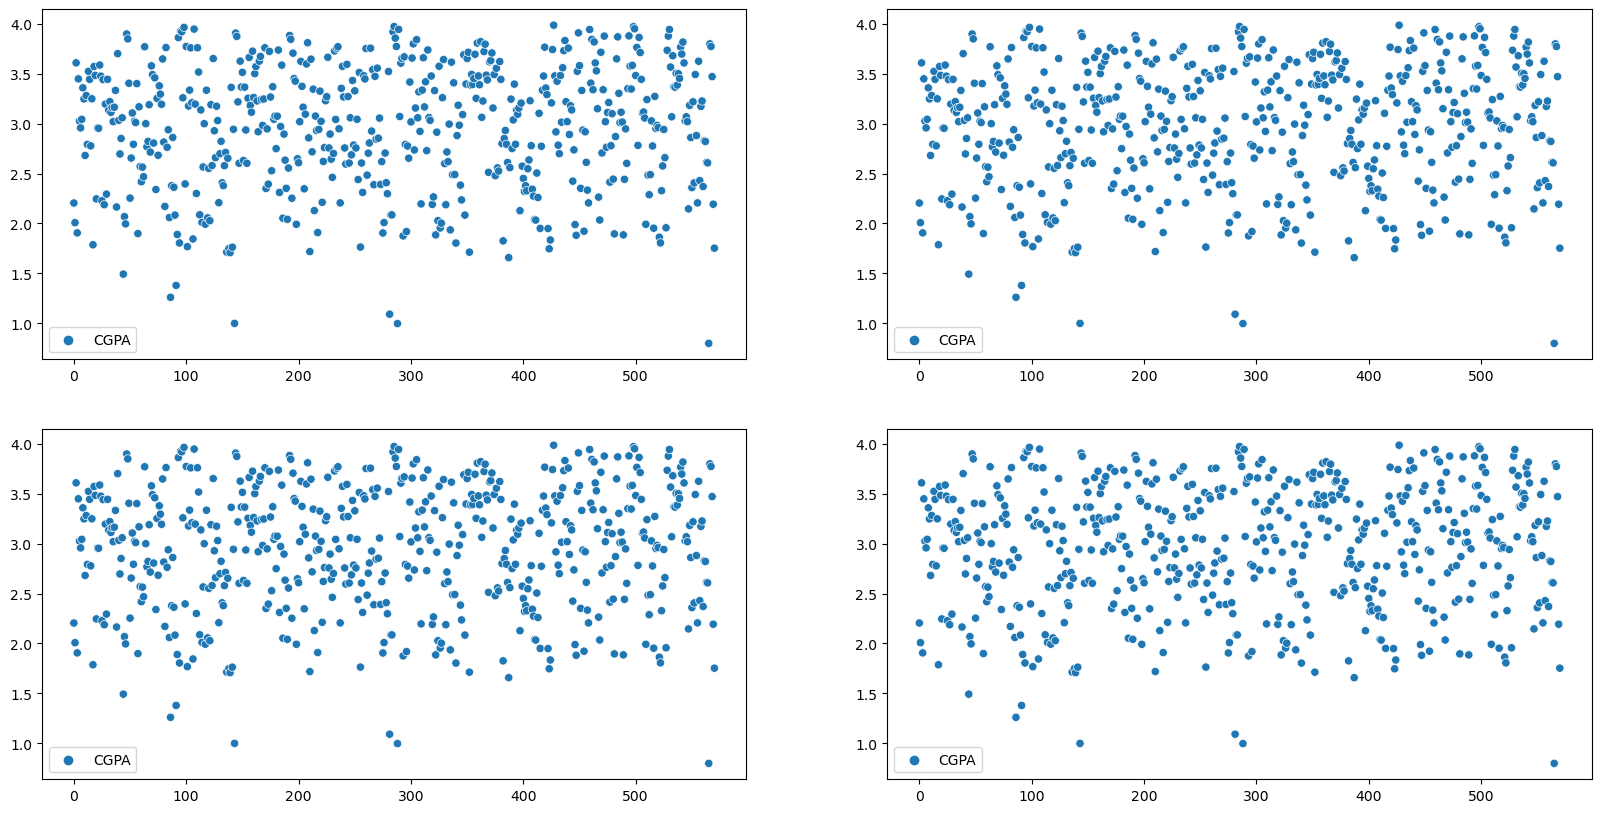

In [38]:
features = ['PH-121', 'HS-101','HS-101', 'CY-105']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df)
plt.show()

<Axes: xlabel='CGPA', ylabel='Density'>

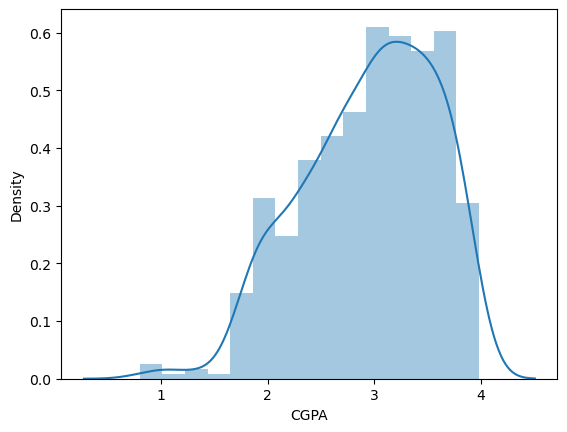

In [39]:
sns.distplot(df['CGPA'])

In [40]:
df.skew()

CGPA   -0.497203
dtype: float64

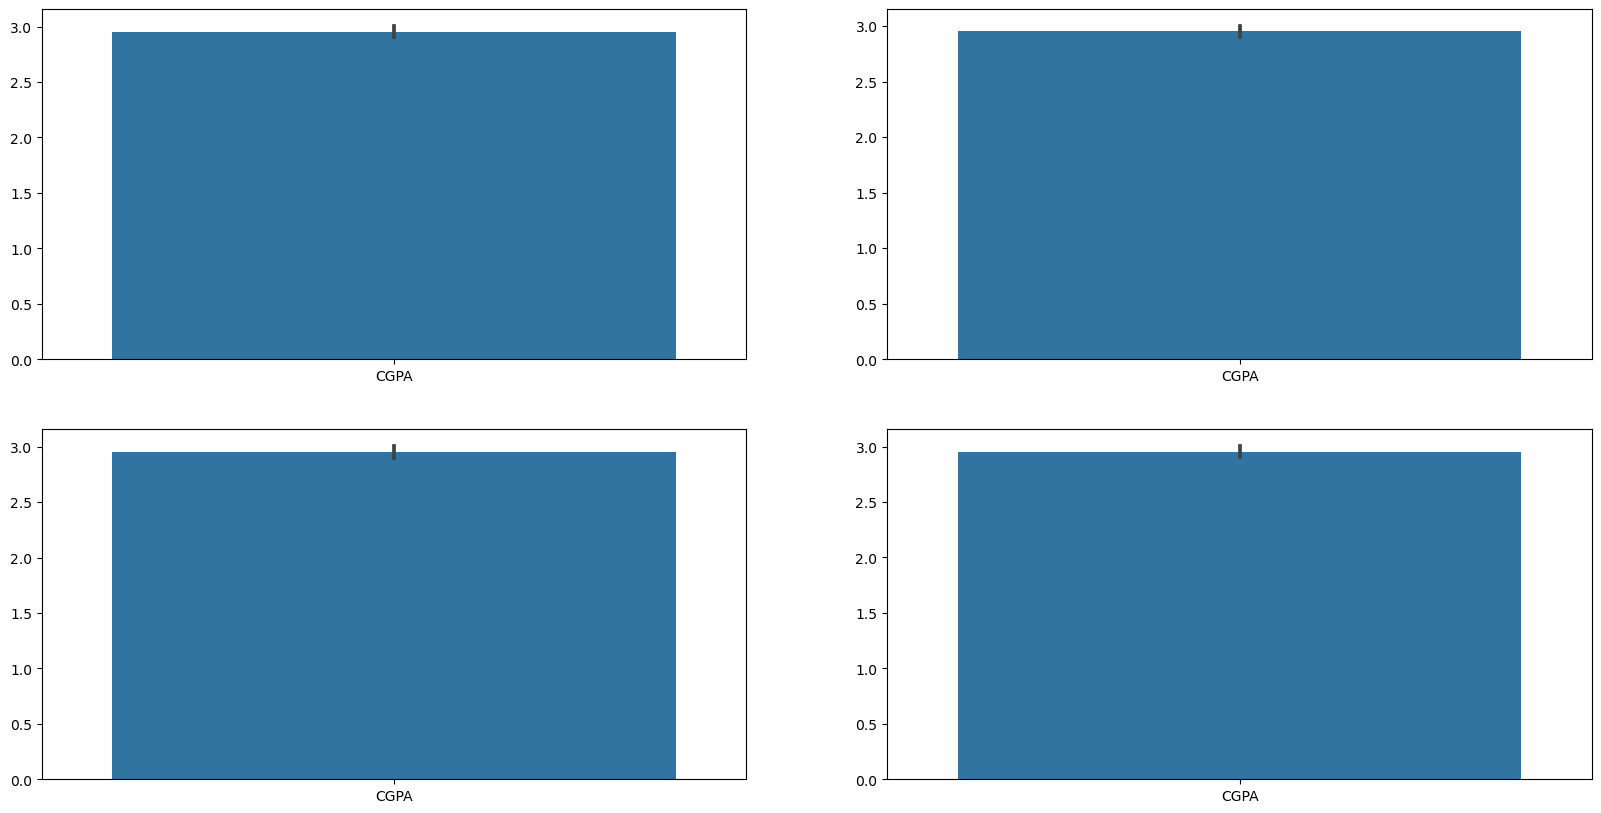

In [41]:
features = ['PH-121', 'HS-101','HS-101', 'CY-105']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=df)
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [43]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [44]:
# to draw the heatmap to know the corelations between all columns

<Axes: >

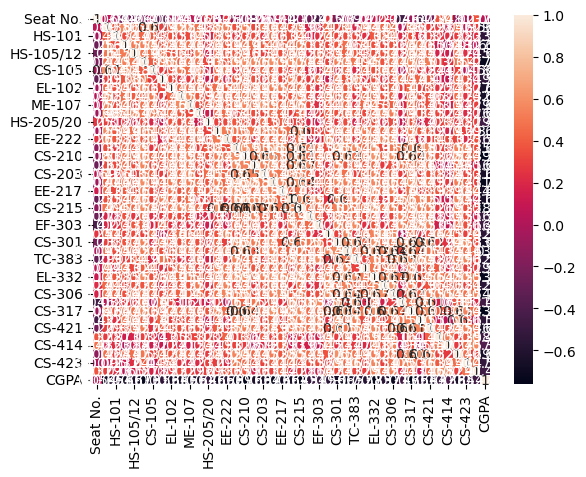

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
df.dtypes

Seat No.       int32
PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

In [47]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [48]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [49]:
df.corr()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.263444,-0.261563,-0.200722,0.000623,-0.311303,-0.034679,0.041367,...,-0.460327,-0.067172,-0.420260,-0.218206,0.372300,0.483884,-0.124479,-0.007148,0.367683,0.054342
PH-121,0.068592,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,-0.263444,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,-0.261563,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,-0.200722,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.000623,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,-0.311303,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,-0.034679,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.041367,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829


Model develop

In [50]:
features=df.drop('CGPA',axis=1)
target=df['CGPA']

In [51]:
X=features.drop('Seat No.',axis=1)

In [52]:
x=X

In [53]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [54]:
y=target

In [55]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [58]:
maxAcc=0
maxRandomState=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_predict=lr.predict(x_test)
    acc=r2_score(y_test,y_predict)
    if acc>maxAcc:
        maxAcc=acc
        maxRandomScore=i
print("Max r2_score is-",maxAcc," on random state -", maxRandomScore)

Max r2_score is- 0.9643494726169242  on random state - 72


In [59]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predict_LR=LR.predict(x_test)
predict_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,predict_LR))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)

R2_score: 0.8946017265626631
R2_score on training data: 94.14721102339074


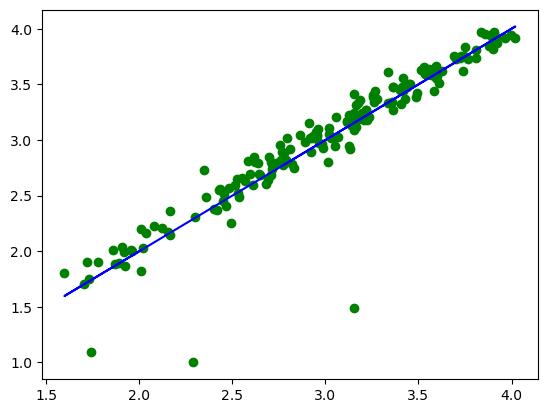

In [91]:
plt.scatter(x=predict_LR,y=y_test,color='g')
plt.plot(predict_LR,predict_LR,color='b')

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict_LR)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))
print("MSE: ",mse)

RMSE:  0.2
MSE:  0.03978169340733566


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, features, target, scoring="neg_mean_squared_error",cv=5, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

RMSE values:  [0.21 0.15 0.2  0.16 0.25]
RMSE average:  0.19379914199499365


In [63]:
print('Validation Error : ', mape(y_test, y_predict))

Validation Error :  0.0468122859479384


In [64]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predict_RFR=rfr.predict(x_test)
predict_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,predict_RFR))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_RFR))
print('mean_squared_error=',mean_squared_error(y_test,predict_RFR))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_RFR)))
print('Validation Error : ', mape(y_test, predict_RFR))

R2_score: 0.9218971775812184
R2_score on training data: 98.73796916296683
mean_abs_error= 0.10589093023255805
mean_squared_error= 0.029479254587209285
root_mean squared error= 0.17169523752046614
Validation Error :  0.045674854660311806


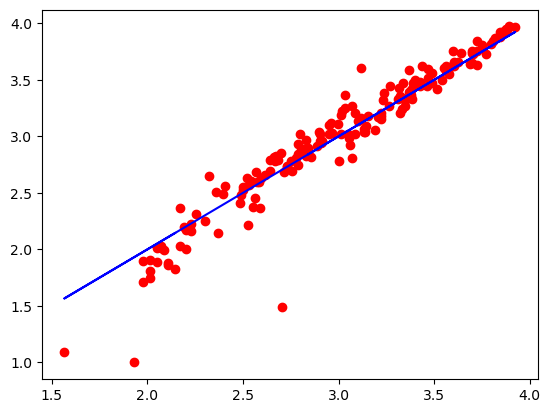

In [65]:
plt.scatter(x=predict_RFR,y=y_test,color='r')
plt.plot(predict_RFR,predict_RFR,color='b')

In [66]:
print('Validation Error : ', mape(y_test, y_predict))

Validation Error :  0.0468122859479384


In [67]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
predict_ABR=abr.predict(x_test)
predict_train=abr.predict(x_train)
print('R2_score:',r2_score(y_test,predict_ABR))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_ABR))
print('mean_squared_error=',mean_squared_error(y_test,predict_ABR))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_ABR)))
print('Validation Error : ', mape(y_test, predict_ABR))

R2_score: 0.8795095866391571
R2_score on training data: 93.52164648781121
mean_abs_error= 0.1600978630516768
mean_squared_error= 0.04547809491105173
root_mean squared error= 0.21325593757513936
Validation Error :  0.05889633367750016


In [68]:
#print('Validation Error : ', mape(y_test, y_predict))

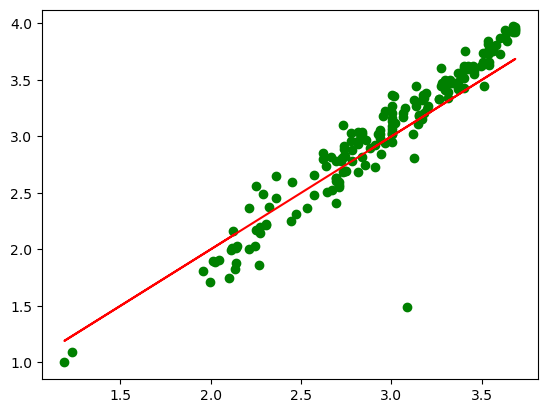

In [90]:
plt.scatter(x=predict_ABR,y=y_test,color='g')
plt.plot(predict_ABR,predict_ABR,color='r')

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predict_DTR=DTR.predict(x_test)
predict_train=DTR.predict(x_train)
print('R2_score:',r2_score(y_test,predict_DTR))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_DTR))
print('mean_squared_error=',mean_squared_error(y_test,predict_DTR))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_DTR)))
print('Validation Error : ', mape(y_test, predict_DTR))

R2_score: 0.7555252499173329
R2_score on training data: 100.0
mean_abs_error= 0.199
mean_squared_error= 0.09227494186046513
root_mean squared error= 0.30376790788439967
Validation Error :  0.07684292183114265


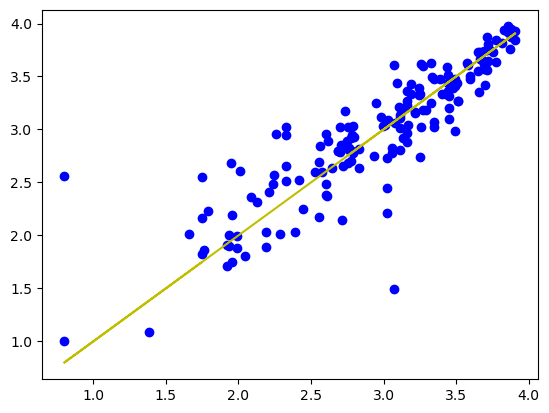

In [89]:
plt.scatter(x=predict_DTR,y=y_test,color='b')
plt.plot(predict_DTR,predict_DTR,color='y')

In [73]:
knn=KNN()
knn.fit(x_train,y_train)
predict_KNN=knn.predict(x_test)
predict_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,predict_KNN))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_KNN))
print('mean_squared_error=',mean_squared_error(y_test,predict_KNN))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_KNN)))

R2_score: 0.8787384450912887
R2_score on training data: 94.06425271573193
mean_abs_error= 0.10325116279069771
mean_squared_error= 0.0457691558139535
root_mean squared error= 0.21393727074531332


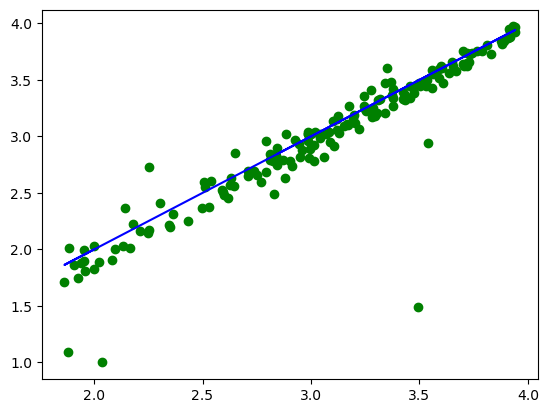

In [88]:
plt.scatter(x=predict_KNN,y=y_test,color='g')
plt.plot(predict_KNN,predict_KNN,color='b')

In [75]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predict_GBR=GBR.predict(x_test)
predict_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,predict_GBR))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_GBR))
print('mean_squared_error=',mean_squared_error(y_test,predict_KNN))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_GBR)))
print('Validation Error : ', mape(y_test, predict_GBR))

R2_score: 0.9363928054674059
R2_score on training data: 99.6423213437187
mean_abs_error= 0.09460980661552028
mean_squared_error= 0.0457691558139535
root_mean squared error= 0.15494515656770402
Validation Error :  0.03873200945971404


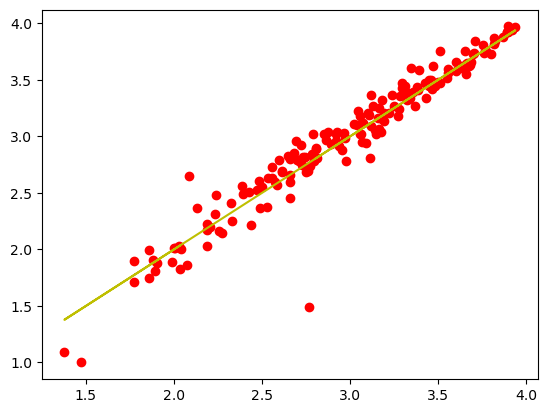

In [87]:
plt.scatter(x=predict_GBR,y=y_test,color='r')
plt.plot(predict_GBR,predict_GBR,color='y')

In [77]:
LA=Lasso()
LA.fit(x_train,y_train)
predict_LA=LA.predict(x_test)
predict_train=LA.predict(x_train)
print('R2_score:',r2_score(y_test,predict_LA))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_LA))
print('mean_squared_error=',mean_squared_error(y_test,predict_LA))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_LA)))
print('Validation Error : ', mape(y_test, predict_LA))

R2_score: 0.3597205378205469
R2_score on training data: 39.36829026079537
mean_abs_error= 0.387467742012691
mean_squared_error= 0.2416681073488404
root_mean squared error= 0.4915975054339072
Validation Error :  0.15296208666698552


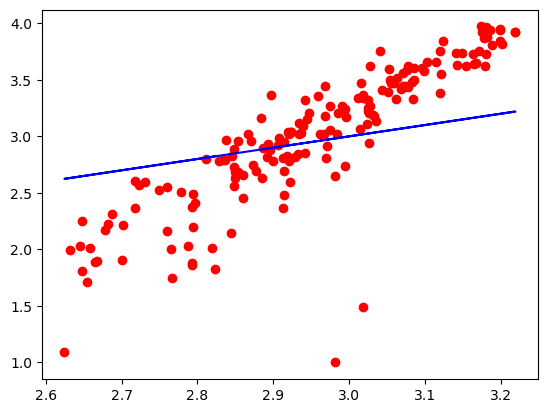

In [78]:
plt.scatter(x=predict_LA,y=y_test,color='r')
plt.plot(predict_LA,predict_LA,color='b')

In [79]:
RI=Ridge()
RI.fit(x_train,y_train)
predict_RI=RI.predict(x_test)
predict_train=RI.predict(x_train)
print('R2_score:',r2_score(y_test,predict_RI))
print('R2_score on training data:',r2_score(y_train,predict_train)*100)
print('mean_abs_error=',mean_absolute_error(y_test,predict_RI))
print('mean_squared_error=',mean_squared_error(y_test,predict_RI))
print('root_mean squared error=',np.sqrt(mean_squared_error(y_test,predict_RI)))
print('Validation Error : ', mape(y_test, predict_RI))

R2_score: 0.8946017775444907
R2_score on training data: 94.14721013762203
mean_abs_error= 0.1052333582507152
mean_squared_error= 0.039781674164672876
root_mean squared error= 0.19945343858824013
Validation Error :  0.046805676406116985


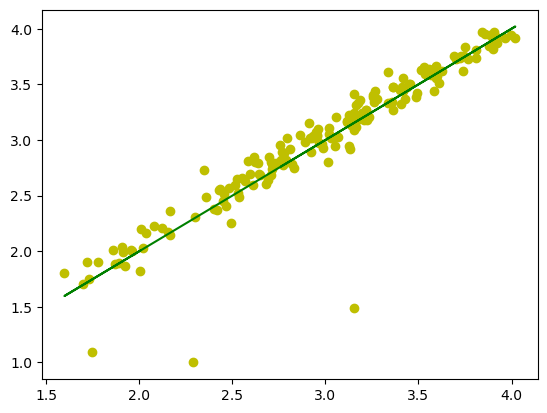

In [86]:
plt.scatter(x=predict_RI,y=y_test,color='y')
plt.plot(predict_RI,predict_RI,color='g')

In [81]:
#GBR=GradientBoostingRegressor() is the best model for predict CGPA

In [82]:
x_test

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
187,3,2,4,5,3,2,4,4,10,3,...,2,5,7,4,7,2,4,3,3,3
202,1,2,0,0,0,1,0,5,4,0,...,2,3,2,4,5,0,0,4,4,4
194,4,3,4,3,5,0,4,8,3,3,...,8,6,10,9,9,2,5,8,4,6
216,5,2,2,0,6,2,2,2,7,6,...,4,5,5,6,8,2,2,8,4,2
360,2,0,4,4,0,4,4,0,2,4,...,4,0,3,2,3,2,2,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,7,3,5,3,0,6,2,4,3,5,...,5,1,4,2,3,2,0,4,0,4
110,0,5,4,2,2,1,2,2,0,0,...,2,4,2,2,2,0,1,2,0,0
379,0,2,0,4,0,4,4,0,3,0,...,2,1,4,0,4,2,0,0,0,0
529,1,0,0,0,0,0,4,0,0,1,...,2,1,1,0,0,1,4,4,0,0
